In [1]:
#Import the necessary libraries
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_openml
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sb

In [2]:
#Import the dataset and split the data into training(INPUT) and testing(OUTPUT) sets.
#Rename input_data to training_data? and output_data to testing_data?
input_data, output_data = fetch_openml("mnist_784", return_X_y=True, as_frame=False, version=1)

In [3]:
#Use the StandardScaler to scale the training features. 
sscaler = StandardScaler()
input_data = sscaler.fit_transform(input_data)

In [4]:
#Split the data into training and testing inputs and outputs.
input_train, output_train, input_test, output_test = train_test_split(input_data, output_data, test_size=.15, random_state=22)

In [5]:
#Create and traing the Logistic Regression model with the input data.
lg_model = LogisticRegression(solver='lbfgs', max_iter=1000)
lg_model.fit(input_train, input_test)

LogisticRegression(max_iter=1000)

In [6]:
#Calculate and return the accuracy of the model.
target_predictions = lg_model.predict(output_train)
accuracy = accuracy_score(output_test, target_predictions)
print(accuracy)

0.9179047619047619


In [26]:
#Create and view the defeault confusion matrix. Then, create a matplotlib plot to clearly map the confusion matrix.
cm = metrics.confusion_matrix(output_test, target_predictions)
print(cm)

[[ 986    0    7    2    3   11   10    2    7    1]
 [   0 1154    8    5    1    6    2    5   17    1]
 [   6   15  934   24    9    6   12    8   17    6]
 [   5    6   18  923    3   29    3   12   15    8]
 [   1    4    8    6  933    0    7    9    5   27]
 [   7    2   10   28   11  834   17    5   25    5]
 [  12    6    9    1   14   19  929    1    7    1]
 [   5    7   15    7    8    1    1 1048    5   43]
 [   5   19   18   29    4   30    9    3  924   21]
 [   3    2    4   20   21    6    0   30    9  973]]


Text(0.5, 1.0, 'Accuracy Score: 0.9179047619047619')

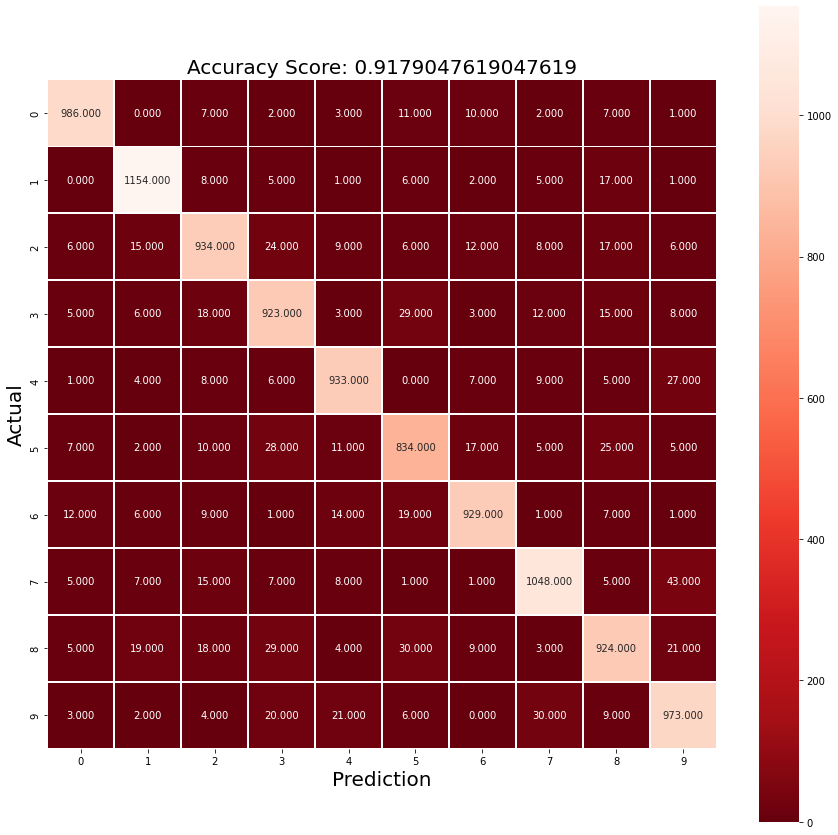

In [20]:
plt.figure(figsize=(15,15))
sb.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Reds_r')
plt.ylabel('Actual', size=20)
plt.xlabel('Prediction', size=20)
title = 'Accuracy Score: {0}'.format(accuracy)
plt.title(title, size = 20)